In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [4]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.5, random_state=2)

In [5]:
model = LogisticRegression(solver="lbfgs")

In [8]:
model.fit(X_Train, Y_Train)

LogisticRegression()

In [9]:
lr_probs = model.predict_proba(X_Test)

In [10]:
lr_probs = lr_probs[:, 1]

In [11]:
y_hat = model.predict(X_Test)

In [12]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_Test, lr_probs)

In [14]:
lr_f1, lr_auc = f1_score(Y_Test, y_hat), auc(lr_recall, lr_precision)

In [16]:
print(f"Logistic: f1={lr_f1} auc={lr_auc:.3f}")

Logistic: f1=0.0 auc=0.054


In [18]:
no_skill = len(Y_Test[Y_Test == 1]) / len(Y_Test)

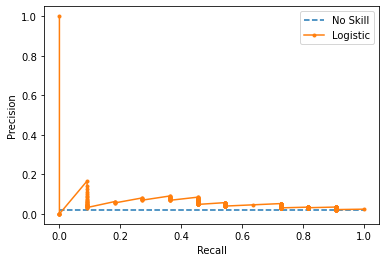

In [19]:
plt.plot([0, 1], [no_skill, no_skill], linestyle="--", label="No Skill")
plt.plot(lr_recall, lr_precision, marker=".", label="Logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [ ]:
# WE CAN SEE THAT THE MODEL IS PENALIZED FOR PREDICTING THE MAJORITY CLASS IN ALL CASES. THE SCORES SHOW THAT THE
# MODEL THAT LOOKED GOOD ACCORDING TO THE ROC CURVE IS IN FACT BARELY SKILLFUL WHEN CONSIDERED USING PRECISION AND RECALL
# THAT FOCUS ON THE POSITIVE CLASS.